# Processor to crop and register multiplane data
* input:
  *  path: path to 3D or 4D stack in tiff format
  *  calpath: path to calibration file
  *    
* output:
  *  4D stack, order
  *  calibration file
  *  processing log file


In [6]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class

In [7]:
proc = MultiplaneProcess()# choose path via gui or direcit input  
proc.select_data_directory()

'F:/moritz/ME034/multiplane/test'

In [8]:
# get metadata if present
proc.get_files_with_metadata()
proc.get_metadata()

{}

In [9]:
proc.P['nplanes']= 8
proc.P['order_default']= [3,2,1,0,4,5,6,7] 
proc.P['use_projection'] = 'median' 
proc.P["apply_transform"]= False
proc.deskew_cam = False

In [10]:
# activate logging
proc.set_logging(True)
#proc.load_calibration()        
proc.cal={}

<tifffile.TiffTag 270 @48893> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'\x80\x01\x92\x01|\x01\xb6\x01Z\x01\x86\x01\x95\x01x\x01\x92\x01u\x01{\x01\x97\x01\x8a\x01\xbb\x0


Read image A3_MEF_tub647_4x2_manual_1_MMStack_Pos0_9.ome.tif; size (2340, 450, 2000); type uint16
Adaptive thresholding cam 0..


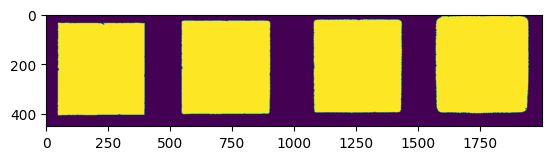

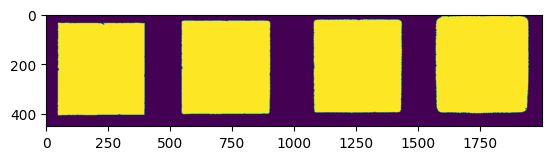

Adaptive thresholding cam 1..


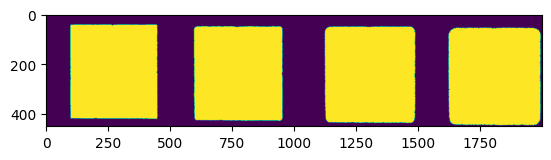

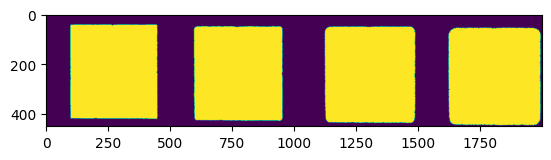

FOV size consolidation: 100%|██████████| 2/2 [00:05<00:00,  2.94s/it]


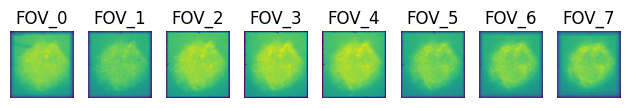

Using order [3, 2, 1, 0, 4, 5, 6, 7]
Registration of data...


 Image plane: 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


{'fovs': {0: {0: [10, 1578, 394, 1941],
   1: [17, 1076, 401, 1439],
   2: [22, 544, 406, 907],
   3: [29, 41, 413, 404]},
  1: {0: [40, 92, 424, 455],
   1: [47, 594, 431, 957],
   2: [52, 1126, 436, 1489],
   3: [59, 1627, 443, 1990]}},
 'deg': {0: 0, 1: 0},
 'order': [3, 2, 1, 0, 4, 5, 6, 7],
 'dz': 620,
 'brightness': {0: 1.0562266982343427,
  1: 1.0829487102983946,
  2: 0.7379969519489532,
  3: 1.0999927372151919,
  4: 1.4143570605337623,
  5: 0.8669084385618774,
  6: 0.8780929450858804,
  7: 0.8634764581215973},
 'transform': array([[[ 4.65523135e-01,  5.46817925e-01, -3.73940473e+01],
         [ 2.35339717e+00,  1.38420786e+00, -5.04187338e+02]],
 
        [[ 2.21647779e-01, -1.45414271e-01,  2.11902795e+02],
         [-4.13691260e-01,  2.14025575e-01,  2.81226203e+02]],
 
        [[ 1.00000000e+00, -0.00000000e+00, -0.00000000e+00],
         [-0.00000000e+00,  1.00000000e+00, -0.00000000e+00]],
 
        [[ 1.04164619e+00,  2.31098919e-01, -1.12259237e+01],
         [-3.8031468

In [11]:
proc.calibrate(is_bead = False)

In [ ]:
proc.load_calibration()


In [ ]:
proc.save_individual = True
proc.execute()